In [12]:
from skimage.color import label2rgb
from data import create_pseudo_image_2d

In [13]:
image, label = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_seg_classes=1)

1
2
3
4
5
6
7
8


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2020)

import torch

The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


(-0.5, 255.5, 255.5, -0.5)

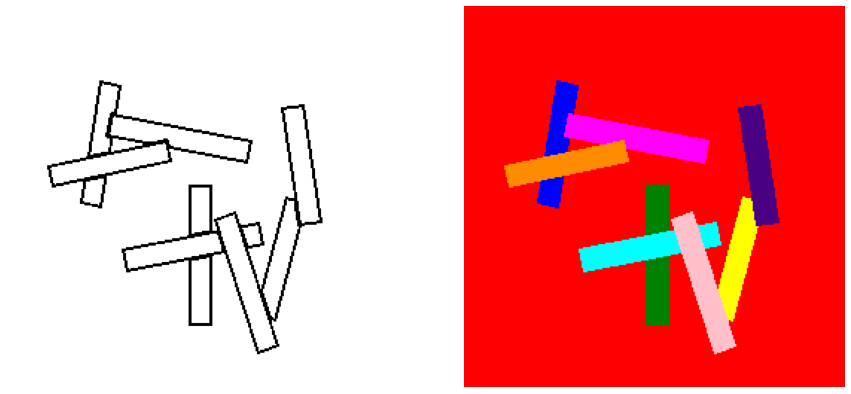

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
plt.gray()

axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(label2rgb(label))
axes[1].axis('off')

In [15]:
image1, label1 = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_objs=4)
image2, label2 = create_pseudo_image_2d(width=256, height=256, noise_max=0.5, num_objs=8)

output, counts = torch.unique(torch.from_numpy(label1), return_counts=True)
print(output)
print(counts)

output, counts = torch.unique(torch.from_numpy(label2), return_counts=True)
print(output)
print(counts)

import torch 
concat = torch.cat([torch.from_numpy(label1).view(1, 1, 256, 256), 
                    torch.from_numpy(label2).view(1, 1, 256, 256)], dim=0)
print(concat.shape)

tensor([0., 1., 2., 4.], dtype=torch.float64)
tensor([59954,  2890,  1348,  1344])
tensor([0., 1., 2., 3., 4., 5.], dtype=torch.float64)
tensor([55301,  3660,  1398,  1018,  1119,  3040])
torch.Size([2, 1, 256, 256])


In [10]:
output, counts = torch.unique(concat, return_counts=True)
print(output)
print(counts)

tensor([0., 1., 2., 3., 4., 5.], dtype=torch.float64)
tensor([116630,   2311,   1982,   2956,   3097,   4096])


[[0. 1. 3. 5.]]
[60414  1108  1344  2670]
[[0. 1. 2. 3. 4. 5.]]
[56216  1203  1982  1612  3097  1426]
[[0. 0. 0. 0. 0. 0. 1. 3. 3. 3. 5. 5. 5.]
 [0. 1. 2. 3. 4. 5. 0. 0. 2. 4. 0. 2. 4.]]
[52285  1203  1524  1612  2364  1426  1108   575   304   465  2248   154
   268]


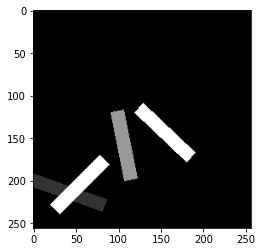

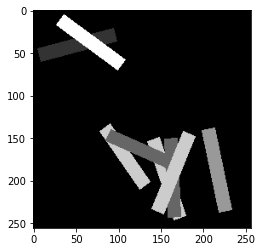

In [11]:
output, counts = np.unique((label1).reshape(1, -1), return_counts=True, axis=1)
print(output)
print(counts)
output, counts = np.unique((label2).reshape(1, -1), return_counts=True, axis=1)
print(output)
print(counts)
output, counts = np.unique(concat.reshape(2, -1), return_counts=True, axis=1)
print(output)
print(counts)
plt.imshow(label2rgb(concat[0].reshape(256, 256)))
plt.show()
plt.imshow(label2rgb(concat[1].reshape(256, 256)))
plt.show()

tensor([[0., 1., 3.]], dtype=torch.float64)
tensor([60099,  1638,  3799])
tensor([[0., 1., 2., 3., 4.]], dtype=torch.float64)
tensor([54718,  2720,  1613,  2581,  3904])
tensor([[0., 0., 0., 0., 0., 1., 3., 3., 3., 3.],
        [0., 1., 2., 3., 4., 0., 0., 1., 3., 4.]], dtype=torch.float64)
tensor([50592,  2376,  1613,  1710,  3808,  1638,  2488,   344,   871,    96])


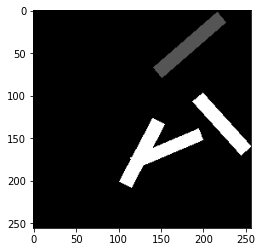

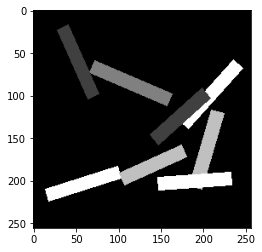

In [8]:
output, counts = torch.unique(torch.from_numpy(label1).view(1, -1), return_counts=True, dim=1)
print(output)
print(counts)
output, counts = torch.unique(torch.from_numpy(label2).view(1, -1), return_counts=True, dim=1)
print(output)
print(counts)
output, counts = torch.unique((concat).view(2, -1), return_counts=True, dim=1)
print(output)
print(counts)
plt.imshow(concat[0].view(256, 256).numpy())
plt.show()
plt.imshow(concat[1].view(256, 256).numpy())
plt.show()